I ran into saving issues on the ALCF jupyter notebooks so I just moved everything to colab

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [2]:
! [ -e ./slimmed_realestate_data.csv ] || wget https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

--2024-11-19 01:54:05--  https://raw.githubusercontent.com/argonne-lcf/ai-science-training-series/main/01_intro_AI_on_Supercomputer/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2024-11-19 01:54:06 (67.2 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [3]:
n = len(data)
x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()
sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)
denominator = n * sum_x2 - sum_x * sum_x
m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892


In [4]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

def model(x,m,b):
   return m * x + b

def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [5]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

batch_size = 32
# convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
#data_x = data['GrLivArea'].to_numpy()
#data_y = data['SalePrice'].to_numpy()
data_batch = data.sample(batch_size)
data_x = data_batch['GrLivArea'].to_numpy()
data_y = data_batch['SalePrice'].to_numpy()
# we run our loop N times

#loop_N = 30
loop_N = 30*len(data)//batch_size

for i in range(loop_N):
   # update our slope and intercept based on the current values
   m = updated_m(data_x,data_y,m,b,learning_rate_m)
   b = updated_b(data_x,data_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

      # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))

[000]  dy_i = 63.19 * x + 15800.02     previously calculated: y_i = 87.69 * x + 34754.08    loss: 5328603331.515837
[001]  dy_i = 83.36 * x + 21325.07     previously calculated: y_i = 87.69 * x + 34754.08    loss: 2153544353.584394
[002]  dy_i = 90.22 * x + 23595.28     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1771024956.026054
[003]  dy_i = 92.44 * x + 24717.74     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1724686689.672171
[004]  dy_i = 93.03 * x + 25430.09     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1717613996.556343
[005]  dy_i = 93.06 * x + 25990.71     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1714779138.102558
[006]  dy_i = 92.90 * x + 26490.22     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1712344206.375268
[007]  dy_i = 92.67 * x + 26960.55     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1709989506.803238
[008]  dy_i = 92.43 * x + 27413.08     previously calculated: y_i = 87.6

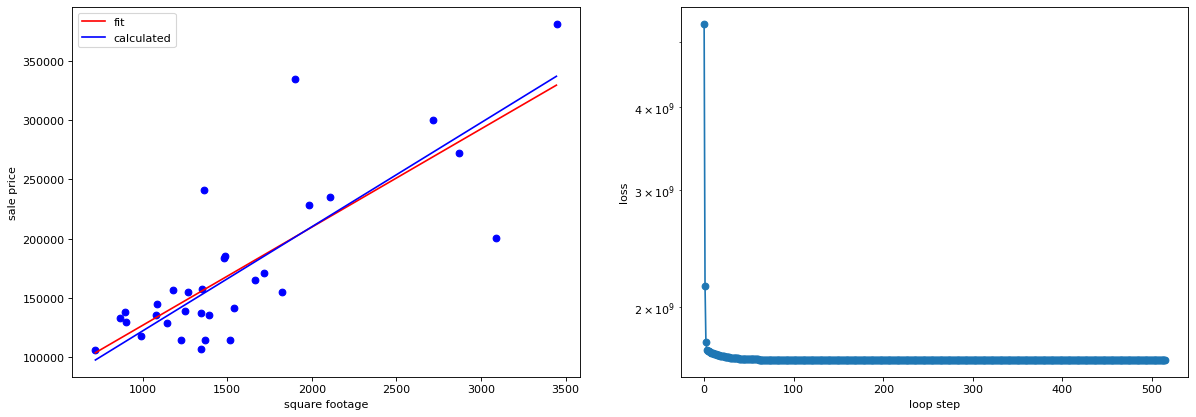

In [6]:


   # close/delete previous plots
   plt.close('all')

   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y, 'o-')
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)

In [7]:
def train(batch_size, epochs=30, learning_rate_m = 1e-7, learning_rate_b = 1e-1):
    loss_history = []
    num_batches = len(data)//batch_size
    loop_N = epochs*num_batches
    m = 5.
    b = 1000.
    for i in range(loop_N):
        data_batch = data.sample(batch_size)
        data_x = data_batch['GrLivArea'].to_numpy()
        data_y = data_batch['SalePrice'].to_numpy()
        # update our slope and intercept based on the current values
        m = updated_m(data_x,data_y,m,b,learning_rate_m)
        b = updated_b(data_x,data_y,m,b,learning_rate_b)

        # calculate the loss value
        loss_value = np.mean(loss(data_x,data_y,m,b))

        # keep a history of our loss values
        loss_history.append(loss_value)
    #loss_last_epoch = np.sum(loss_history[-num_batches:]*batch_size)/len(data)
    return m, b, np.mean(loss(x,y,m,b))

I separated the plot above as it was taking exceendingly long to run plotting every step.
I had initially also set up the above loop similar to the solution but ran into issues.

In [8]:
print('previously calculated: y_i = %.2f * x + %.2f    loss: %f\n=======================================' % (m_calc,b_calc,loss_value))


for bs in 64, 128, 256, 512:
    m, b, l = train(bs, epochs=30)
    print(f"batch size: {bs}, m={m:.4f}, b={b:.4f}, loss={l:.4f}")

previously calculated: y_i = 87.69 * x + 34754.08    loss: 1664946654.692382
batch size: 64, m=86.3069, b=34449.7871, loss=1483363645.7197
batch size: 128, m=86.2077, b=35246.2951, loss=1480918577.2197
batch size: 256, m=89.2613, b=33519.8967, loss=1479423371.8196
batch size: 512, m=88.5625, b=33273.7909, loss=1478053756.5454


In [9]:
for i in 1, 2, 4, 8:
    bs, lrm, lrb = np.array([64, 1e-7, 1e-1])*i
    bs = int(bs)
    m, b, l = train(int(bs), epochs=30, learning_rate_m = lrm, learning_rate_b = lrb)
    print(f"batch size: {bs}, m={m:.4f}, b={b:.4f}, loss={l:.4f}")

batch size: 64, m=91.8314, b=29403.0859, loss=1482729400.7614
batch size: 128, m=90.1477, b=32971.0142, loss=1482265299.1842
batch size: 256, m=84.6369, b=37116.1407, loss=1484079212.9763
batch size: 512, m=55516.8812, b=75418639.1614, loss=24383560007869756.0000
